In [1]:
import networkx as nx
from collections import defaultdict
from itertools import combinations
from bs4 import BeautifulSoup  
import json
import pandas as pd
import concurrent.futures 
import requests
import math
import csv
from collections import Counter
import ast
import netwulf as nw
import matplotlib.pyplot as plt
import pickle
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import wordcloud
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import netwulf as nw
import matplotlib.pyplot as plt
import string

In [162]:
dictionaries = []
def process_data(date):
    link = "https://www.wunderground.com/history/daily/us/ny/new-york-city/KLGA/date/"
    link += date
    chrome_prefs = {
        "profile.default_content_settings.cookies": 1  
    }
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_experimental_option("prefs", chrome_prefs)
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=chrome_options)
    driver.get(link)
    driver.implicitly_wait(15)
    table = driver.find_element(By.XPATH, '//*[@id="inner-content"]/div[2]/div[1]/div[5]/div[1]/div/lib-city-history-observation/div/div[2]/table')
    rows = table.find_elements(By.TAG_NAME, 'tr')
    rows.pop(0)
    weather_data = {}
    attributes = ['Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Precip.', 'Condition']
    
    for row in rows:
        if(len(row.text)>3):
            parts = row.text.strip().split(" ")
            
            time = ' '.join(parts[:2])
            details = {
                attributes[0]: parts[2] + ' ' + parts[3],  # Temperature
                attributes[1]: parts[4] + ' ' + parts[5],  # Dew Point
                attributes[2]: parts[6] + ' ' + parts[7],  # Humidity
                attributes[3]: parts[8],                   # Wind
                attributes[4]: parts[9],                   # Wind Speed
                attributes[5]: parts[11],                  # Wind Gust
                attributes[6]: parts[13] + ' ' + parts[14],# Pressure
                attributes[7]: parts[15] + ' ' + parts[16],# Precip.
                attributes[8]: ' '.join(parts[17:])                   # Condition
                }
            weather_data[time] = details
    driver.quit()
    dictionaries.append(weather_data)


In [ ]:
dates = []
#dictionaries = []
for i in range(31):
    day = i+1
    print(day)
    dates.append("2023-5-"+str(day))  

In [ ]:
annual_data = {}


In [163]:
with open('transformed_data.json', 'r') as file:
    data = json.load(file)
average_per_year = []
for year in data.items():
    average_per_month = []
    for day in year[1].items():
        sum = 0.0
        for time in day[1].items():
            precip = time[1]["Precip."].strip("in").strip(" ")
            sum += float(precip)
        average = float(sum/len(day))
        average_per_month.append(average)
    average_per_year.append(average_per_month)



In [190]:
for year in average_per_year:
    #print(year)
    pass
sum = 0
for yes in data.items():
    for aa in yes[1].items():
        sum +=len(aa[1])
print(sum)

9963


In [22]:
max_difference = []
for j in range(len(average_per_year[0])):
    temp_max = 0.0
    max_index = []
    temp_min = 1.0
    min_index = []
    for i in range(len(average_per_year)):
        if (float(average_per_year[i][j]) > temp_max):
            temp_max = average_per_year[i][j]
            max_index = [2013+i,1+j]
        if float(average_per_year[i][j]) < temp_min:
            temp_min = average_per_year[i][j]
            min_index = [2013+i,1+j]
    difference = temp_max-temp_min
    max_difference.append([difference,max_index,min_index])

    


In [23]:
print(max_difference)

[[0.39999999999999997, [2014, 1], [2013, 1]], [0.7000000000000001, [2022, 2], [2013, 2]], [0.65, [2016, 3], [2013, 3]], [0.3, [2021, 4], [2013, 4]], [2.6500000000000004, [2017, 5], [2013, 5]], [0.65, [2016, 6], [2013, 6]], [0.6500000000000001, [2022, 7], [2013, 7]], [2.150000000000001, [2013, 8], [2015, 8]], [0.5, [2013, 9], [2014, 9]], [1.0, [2014, 10], [2013, 10]], [0.8999999999999999, [2013, 11], [2014, 11]], [0.9500000000000002, [2019, 12], [2013, 12]], [1.1500000000000001, [2017, 13], [2013, 13]], [0.15000000000000002, [2019, 14], [2013, 14]], [0.35, [2018, 15], [2013, 15]], [1.35, [2014, 16], [2013, 16]], [0.35, [2018, 17], [2013, 17]], [0.0, [], [2013, 18]], [0.75, [2022, 19], [2014, 19]], [0.8500000000000001, [2023, 20], [2013, 20]], [0.05, [2016, 21], [2013, 21]], [0.5, [2017, 22], [2013, 22]], [0.6000000000000001, [2014, 23], [2015, 23]], [0.2, [2014, 24], [2015, 24]], [0.44999999999999996, [2017, 25], [2013, 25]], [0.3, [2017, 26], [2013, 26]], [0.6499999999999999, [2018, 27

In [126]:
regions = {}
with open('taxi_zone_lookup.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        regions[row[0]] = row[1]




In [127]:
print(regions)

{'1': 'EWR', '2': 'Queens', '3': 'Bronx', '4': 'Manhattan', '5': 'Staten Island', '6': 'Staten Island', '7': 'Queens', '8': 'Queens', '9': 'Queens', '10': 'Queens', '11': 'Brooklyn', '12': 'Manhattan', '13': 'Manhattan', '14': 'Brooklyn', '15': 'Queens', '16': 'Queens', '17': 'Brooklyn', '18': 'Bronx', '19': 'Queens', '20': 'Bronx', '21': 'Brooklyn', '22': 'Brooklyn', '23': 'Staten Island', '24': 'Manhattan', '25': 'Brooklyn', '26': 'Brooklyn', '27': 'Queens', '28': 'Queens', '29': 'Brooklyn', '30': 'Queens', '31': 'Bronx', '32': 'Bronx', '33': 'Brooklyn', '34': 'Brooklyn', '35': 'Brooklyn', '36': 'Brooklyn', '37': 'Brooklyn', '38': 'Queens', '39': 'Brooklyn', '40': 'Brooklyn', '41': 'Manhattan', '42': 'Manhattan', '43': 'Manhattan', '44': 'Staten Island', '45': 'Manhattan', '46': 'Bronx', '47': 'Bronx', '48': 'Manhattan', '49': 'Brooklyn', '50': 'Manhattan', '51': 'Bronx', '52': 'Brooklyn', '53': 'Queens', '54': 'Brooklyn', '55': 'Brooklyn', '56': 'Queens', '57': 'Queens', '58': 'Bron

In [113]:
urls = {
    "Bronx": ["https://en.wikipedia.org/wiki/The_Bronx","https://en.wikipedia.org/wiki/Co-op_City,_Bronx","https://en.wikipedia.org/wiki/Yankee_Stadium", "https://en.wikipedia.org/wiki/Bronx_Zoo", "https://en.wikipedia.org/wiki/Bronx_Museum_of_the_Arts", "https://en.wikipedia.org/wiki/The_Hub,_Bronx", "https://en.wikipedia.org/wiki/Morris_Heights,_Bronx","https://en.wikipedia.org/wiki/Pelham_Bay_Park","https://en.wikipedia.org/wiki/Van_Cortlandt_Park","https://en.wikipedia.org/wiki/Bronx_Park","https://en.wikipedia.org/wiki/Crotona_Park","https://en.wikipedia.org/wiki/St._Mary%27s_Park_(Bronx)","https://en.wikipedia.org/wiki/St._James_Park_(Bronx)","https://en.wikipedia.org/wiki/Macombs_Dam_Park","https://en.wikipedia.org/wiki/Henry_Hudson_Park","https://en.wikipedia.org/wiki/Ferry_Point_Park","https://en.wikipedia.org/wiki/Soundview_Park_(Bronx)","https://en.wikipedia.org/wiki/Pregones_Theater","https://en.wikipedia.org/wiki/Bronx_Academy_of_Arts_and_Dance","https://en.wikipedia.org/wiki/Fordham_Road","https://en.wikipedia.org/wiki/Bay_Plaza_Shopping_Center"], 
    "Brooklyn": ["https://en.wikipedia.org/wiki/Brooklyn","https://en.wikipedia.org/wiki/Downtown_Brooklyn","https://en.wikipedia.org/wiki/Brooklyn_Bridge","https://en.wikipedia.org/wiki/Coney_Island","https://en.wikipedia.org/wiki/Brooklyn_Museum", "https://en.wikipedia.org/wiki/Brooklyn_Borough_Hall","https://en.wikipedia.org/wiki/Barclays_Center","https://en.wikipedia.org/wiki/Brooklyn_College","https://en.wikipedia.org/wiki/Greenpoint,_Brooklyn","https://en.wikipedia.org/wiki/Sunset_Park,_Brooklyn","https://en.wikipedia.org/wiki/Eighth_Avenue_(Brooklyn)#Chinatown","https://en.wikipedia.org/wiki/Brooklyn_Botanic_Garden","https://en.wikipedia.org/wiki/Grand_Army_Plaza","https://en.wikipedia.org/wiki/The_Brooklyn_Tower","https://en.wikipedia.org/wiki/Floyd_Bennett_Field","https://en.wikipedia.org/wiki/New_York_Transit_Museum","https://en.wikipedia.org/wiki/Prospect_Park_(Brooklyn)","https://en.wikipedia.org/wiki/Prospect_Park_Zoo","https://en.wikipedia.org/wiki/Fort_Greene_Park"],
    "Manhattan":["https://en.wikipedia.org/wiki/Manhattan", "https://en.wikipedia.org/wiki/American_Museum_of_Natural_History", "https://en.wikipedia.org/wiki/The_Battery_(Manhattan)", "https://en.wikipedia.org/wiki/Broadway_(Manhattan)", "https://en.wikipedia.org/wiki/Theater_District,_Manhattan", "https://en.wikipedia.org/wiki/Bryant_Park", "https://en.wikipedia.org/wiki/Central_Park", "https://en.wikipedia.org/wiki/Chinatown,_Manhattan", "https://en.wikipedia.org/wiki/Chrysler_Building", "https://en.wikipedia.org/wiki/The_Cloisters", "https://en.wikipedia.org/wiki/Columbia_University", "https://en.wikipedia.org/wiki/Empire_State_Building", "https://en.wikipedia.org/wiki/Flatiron_Building", "https://en.wikipedia.org/wiki/Financial_District,_Manhattan", "https://en.wikipedia.org/wiki/New_York_Stock_Exchange_Building", "https://en.wikipedia.org/wiki/Wall_Street", "https://en.wikipedia.org/wiki/Greenwich_Village", "https://en.wikipedia.org/wiki/New_York_University","https://en.wikipedia.org/wiki/Harlem", "https://en.wikipedia.org/wiki/Koreatown,_Manhattan", "https://en.wikipedia.org/wiki/Lincoln_Center", "https://en.wikipedia.org/wiki/Metropolitan_Museum_of_Art", "https://en.wikipedia.org/wiki/Pennsylvania_Station_(New_York_City)", "https://en.wikipedia.org/wiki/National_September_11_Museum", "https://en.wikipedia.org/wiki/World_Trade_Center_(2001%E2%80%93present)", "https://en.wikipedia.org/wiki/Times_Square","https://en.wikipedia.org/wiki/Rockefeller_Center"],
    "Queens": ["https://en.wikipedia.org/wiki/Flushing,_Queens","https://en.wikipedia.org/wiki/Elmhurst,_Queens#Chinatown,_Elmhurst_(%E5%94%90%E4%BA%BA%E8%A1%97,_%E8%89%BE%E5%A7%86%E8%B5%AB%E6%96%AF%E7%89%B9)","https://en.wikipedia.org/wiki/Queens", "https://en.wikipedia.org/wiki/John_F._Kennedy_International_Airport", "https://en.wikipedia.org/wiki/Flushing_Meadows%E2%80%93Corona_Park", "https://en.wikipedia.org/wiki/LaGuardia_Airport", "https://en.wikipedia.org/wiki/Downtown_Flushing", "https://en.wikipedia.org/wiki/St._Albans,_Queens#Addisleigh_Park_subsection","https://en.wikipedia.org/wiki/Long_Island_City", "https://en.wikipedia.org/wiki/Queensboro_Bridge", "https://en.wikipedia.org/wiki/Citi_Field", "https://en.wikipedia.org/wiki/Arthur_Ashe_Stadium", "https://en.wikipedia.org/wiki/Queens_Public_Library", "https://en.wikipedia.org/wiki/St._Michael%27s_Cemetery_(New_York)","https://en.wikipedia.org/wiki/All_Faiths_Cemetery","https://en.wikipedia.org/wiki/Calvary_Cemetery_(Queens)", "https://en.wikipedia.org/wiki/Cypress_Hills_Cemetery", "https://en.wikipedia.org/wiki/Mount_Olivet_Cemetery_(Queens)", "https://en.wikipedia.org/wiki/Mount_Zion_Cemetery_(New_York_City)","https://en.wikipedia.org/wiki/Jackson_Heights,_Queens"],
    "Staten Island":["https://en.wikipedia.org/wiki/Staten_Island","https://en.wikipedia.org/wiki/Verrazzano-Narrows_Bridge","https://en.wikipedia.org/wiki/Staten_Island_Zoo","https://en.wikipedia.org/wiki/Staten_Island_Ferry","https://en.wikipedia.org/wiki/College_of_Staten_Island","https://en.wikipedia.org/wiki/Historic_Richmond_Town","https://en.wikipedia.org/wiki/Staten_Island_Borough_Hall","https://en.wikipedia.org/wiki/Great_Kills_Park", "https://en.wikipedia.org/wiki/Miller_Field_(Staten_Island)","https://en.wikipedia.org/wiki/Fort_Wadsworth", "https://en.wikipedia.org/wiki/Conference_House_Park", "https://en.wikipedia.org/wiki/Willowbrook_Park", "https://en.wikipedia.org/wiki/Empire_Outlets","https://en.wikipedia.org/wiki/St._George_Terminal","https://en.wikipedia.org/wiki/Postcards_(memorial)","https://en.wikipedia.org/wiki/Sailors%27_Snug_Harbor","https://en.wikipedia.org/wiki/SIUH_Community_Park"],
}

temp = []
for info in urls.items():
    temp_text=""
    for url in info[1]:
        
        # print(url)
        page = ""
        r = requests.get(url)
        soup = BeautifulSoup(r.content)
        texts = soup.find_all("p")
        for text in texts:
            page +=text.text
        temp_text+=page
    temp.append(temp_text)

In [122]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    # Add custom words to stop words
    stop_words.update(["new", "new work", "york city", "york", "bronx", "brooklyn", 
                       "manhattan", "queen", "staten island", "city", "nyc","queens", "staten", "island",])
    
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Re-create document from filtered tokens
    return ' '.join(lemmatized_words)

# temp[0] = clean_text(temp[0])
# temp[0] = temp[0].split(" ")

# word_cloud = wordcloud.WordCloud().generate(str(temp[0]))
# for word in temp[0]:
#     print(word)
# plt.imshow(word_cloud)
# plt.axis("off")
# plt.show()


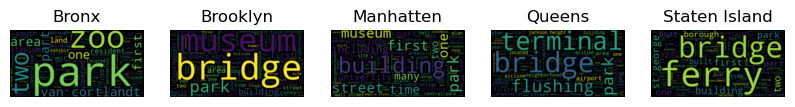

In [136]:
fig, axs = plt.subplots(1, 5, figsize=(10, 10))

titles = ['Bronx', 'Brooklyn', 'Manhatten', 'Queens', 'Staten Island']
temp_ = temp.copy()
for i in range(5):
    temp_[i] = clean_text(temp_[i])
    temp_[i] = temp_[i].split(" ")
    wc = wordcloud.WordCloud().generate(' '.join(temp_[i]))
    axs[i].imshow(wc, interpolation='bilinear')
    axs[i].axis("off")
    axs[i].set_title(titles[i])

# plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [134]:
def create_unique_pairs(pairs):
    route_dict = {}
    for tip, locations in pairs:
        sorted_locations = tuple((locations))
        if sorted_locations in route_dict:
            route_dict[sorted_locations][0] += tip 
            route_dict[sorted_locations][1] += 1   
        else:
            route_dict[sorted_locations] = [tip, 1] 
    average_tips = {locations: sum_tip_count[0] / sum_tip_count[1] for locations, sum_tip_count in route_dict.items()}
    unique_route_list = [[list(locations), avg_tip] for locations, avg_tip in average_tips.items()]
    return unique_route_list
def load_taxi_data(file_path):
    inflation = 1
    if(file_path == "df_5th_may_2013.csv"):
        inflation = 1.05
    pairs = []
    df = pd.read_csv(file_path)
    for row in df.iterrows():
        location = [row[1][2],row[1][3]]
        location.sort()
        pairs.append([row[1][1]*inflation,location])
    return pairs

In [156]:
G_2013 = nx.Graph()
G_2017 = nx.Graph()
data = []
panda_file_paths = ["df_5th_may_2013.csv","df_5th_may_2017.csv"]

In [157]:
for path in panda_file_paths:
    all_pairs = (load_taxi_data(path))
    unique_pairs = create_unique_pairs(all_pairs)
    unique_pairs.sort(key=lambda x: x[1])
    data.append(unique_pairs)


In [158]:
def createGraph(data, G):
    for pair in data:
        G.add_edge(pair[0][0],pair[0][1],attr=pair[1])

    for node in G.nodes():
        color = "gray"
        if(regions[str(node)] == "Manhattan"):
            color = "yellow"
        if(regions[str(node)]  == "Queens"):
            color = "purple"
        if(regions[str(node)]  == "Bronx"):
            color = "green"    
        if(regions[str(node)]  == "Staten Island"):
            color = "magenta"
        if(regions[str(node)]  == "Brooklyn"):
            color = "blue" 
        node_attributes = {"group" : color}
        G.nodes[node].update(node_attributes)

In [159]:
createGraph(data[0],G_2013)
createGraph(data[1],G_2017)

print(G_2013.number_of_nodes())
print(G_2013.number_of_edges())
print(G_2017.number_of_nodes())
print(G_2017.number_of_edges())

257
9757
257
7914


In [161]:
with open('network_config.json', 'r') as f:
    loaded_config = json.load(f)
stylized_network, config = nw.visualize(G_2017, config=loaded_config)